In [256]:
import numpy as np
from numpy.linalg import pinv

import pandas as pd

import networkx as nx
import pydot
from IPython.display import Image, display

import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(precision=4, suppress=True)

# Chicken Problem

First, a problem similar to the game "chicken", where the choice is to either advance or return to the start.
Advancing all the way to the end yields a reward of 1, indicating successfully bumping into the wall.

In [136]:
# Chicken problem solved analytically
ns = 6
I = np.eye(ns)

# Probability of transitioning from state s_i --> s_j = P[i,j]
P = np.diag(np.ones(ns-1), 1) * 0.5
P[:,0] = 0.5
P[-1, 0] = 1

# Expected reward for transitioning from s_i --> s_j = R[i,j]
R = np.zeros((ns, ns))
R[-2, -1] = 1.0
r = np.sum(P*R, axis=1)

# Discount
gvec = np.ones(ns)*0.9
gvec[0] = 0
# gvec[-1] = 0
G = np.diag(gvec)

# Bootstrapping
L = np.eye(ns)*0.0

# Function approximation
X = np.eye(ns)


# Value function
v_pi = pinv(I - P @ G) @ r


# From sobel, recursive expected variance contribution?
T = -v_pi**2
for i in range(ns):
    for j in range(ns):
        T[i] += P[i,j] * (R[i,j] + gvec[j]*v_pi[j])**2

# Alternatively,
# T = np.sum(P * (R + G @ v_pi)**2, axis=1) - v_pi**2
        
# Variance (again from Sobel)
v_var = pinv(I - P @ G @ G) @ T 

print(v_pi)
print(T)
print(v_var)

[ 0.0205  0.0456  0.1013  0.225   0.5     0.    ]
[ 0.0004  0.0021  0.0103  0.0506  0.25   -0.    ]
[ 0.013   0.0311  0.0718  0.1519  0.25   -0.    ]


## Drawing the MDP

We attempt to use `networkx` and `pydot` to render the MDPs.
They are not ideal, but at least allow us to quickly check for errors.

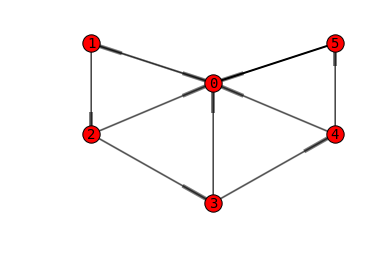

In [137]:
# Convert to networkx graph
graph = nx.DiGraph(P)

# Initial layout
pos = nx.spring_layout(graph)
pos = nx.circular_layout(graph)
pos = nx.layout.shell_layout(graph)
# pos = nx.layout.fruchterman_reingold_layout(graph)
pos = nx.layout.spectral_layout(graph)

# Nodes
nx.draw_networkx_nodes(graph, pos)
nx.draw_networkx_labels(graph, pos, font_size=14, font_family='monospace')

# Edges
eweights = {(i,j): P[i,j] for i,j in graph.edges()}
ecolors = [eweights[k] for k in graph.edges()]
nx.draw_networkx_edges(graph, pos, edgelist=graph.edges(), 
                       edge_color=ecolors, 
                       edge_cmap=plt.cm.Greys, 
                       edge_vmax=1.0, 
                       edge_vmin=0.0,
                       width=2.0,
                       arrows=None)

# To get arrowheads
nx.draw_networkx_edges(graph, pos, edgelist=graph.edges(), alpha=0.5, arrows=True) 


# nx.draw_networkx_edge_labels(graph, pos, edge_labels=eweights)

plt.axis('off')
plt.show()

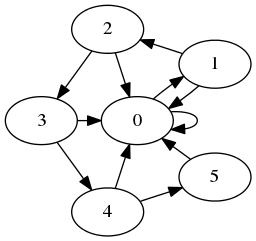

In [138]:
ptg = nx.nx_pydot.to_pydot(graph)
img = ptg.create_png(prog='twopi')
Image(img)

# Rich & Craig Counterexample

Here is the counterexample to the Tamar paper that Rich and Craig came up with.
Note that the variance of the return is always zero, even if the variance of the immediate reward may not be.

In [139]:
# Chicken problem solved analytically
ns = 6
I = np.eye(ns)

# Probability of transitioning from state s_i --> s_j = P[i,j]
P = np.zeros((ns, ns))
P[0, 1:3] = 0.5 
P[-3:-1, -1] = 1
P[1, 3] = 1
P[2, 4] = 1
P[-1, 0] = 1

# Expected reward for transitioning from s_i --> s_j = R[i,j]
R = np.zeros((ns, ns))
R[0, 1] = 1
R[0, 2] = -1
R[3, 5] = -1
R[4, 5] = 1
r = np.sum(P*R, axis=1)

# Discount
gvec = np.ones(ns)
gvec[0] = 0
G = np.diag(gvec)

# Bootstrapping
L = np.eye(ns)*0.0

# Function approximation
X = np.eye(ns)


# Value function
v_pi = pinv(I - P @ G) @ r


# From sobel, recursive expected variance contribution?
T = -v_pi**2
for i in range(ns):
    for j in range(ns):
        T[i] += P[i,j] * (R[i,j] + gvec[j]*v_pi[j])**2

# Alternatively,
# T = np.sum(P * (R + G @ v_pi)**2, axis=1) - v_pi**2
        
# Variance (again from Sobel)
v_var = pinv(I - P @ G @ G) @ T 

print(v_pi)
print(T)
print(v_var)

[ 0. -1.  1. -1.  1.  0.]
[ 0. -0. -0.  0.  0. -0.]
[-0.  0. -0.  0.  0.  0.]


In [140]:
P

array([[ 0. ,  0.5,  0.5,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  1. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  1. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  1. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  1. ],
       [ 1. ,  0. ,  0. ,  0. ,  0. ,  0. ]])

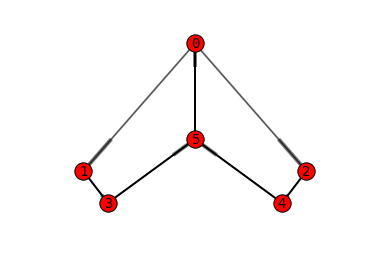

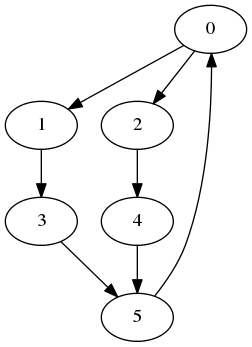

In [141]:
# Convert to networkx graph
graph = nx.DiGraph(P)

# Initial layout
# pos = nx.spring_layout(graph)
# pos = nx.circular_layout(graph)
# pos = nx.layout.shell_layout(graph)
# pos = nx.layout.fruchterman_reingold_layout(graph)
pos = nx.layout.spectral_layout(graph)


# Nodes
nx.draw_networkx_nodes(graph, pos)
nx.draw_networkx_labels(graph, pos, font_size=14, font_family='monospace')

# Edges
eweights = {(i,j): P[i,j] for i,j in graph.edges()}
ecolors = [eweights[k] for k in graph.edges()]
nx.draw_networkx_edges(graph, pos, edgelist=graph.edges(), 
                       edge_color=ecolors, 
                       edge_cmap=plt.cm.Greys, 
                       edge_vmax=1.0, 
                       edge_vmin=0.0,
                       width=2.0,
                       arrows=None)

# To get arrowheads
nx.draw_networkx_edges(graph, pos, edgelist=graph.edges(), alpha=0.5, arrows=True) 


# nx.draw_networkx_edge_labels(graph, pos, edge_labels=eweights)

plt.axis('off')
plt.show()

ptg = nx.nx_pydot.to_pydot(graph)
img = ptg.create_png(prog='dot')
Image(img)

# 1-D Random Walk 

In [144]:
# Chicken problem solved analytically
ns = 6
I = np.eye(ns)

# Probability of transitioning from state s_i --> s_j = P[i,j]
P = np.diag(np.ones(ns-1), 1) * 0.5
P += P.T
P[0,0] = 0.5
P[-1, -1] = 0.5

# Expected reward for transitioning from s_i --> s_j = R[i,j]
R = np.zeros((ns, ns))
R[0,0] = 1
R[-1, -1] = -1
r = np.sum(P*R, axis=1)

# Discount
gvec = np.ones(ns)*0.9
gvec[0] = 0
# gvec[-1] = 0
G = np.diag(gvec)

# Bootstrapping
L = np.eye(ns)*0.0

# Function approximation
X = np.eye(ns)


# Value function
v_pi = pinv(I - P @ G) @ r


# From sobel, recursive expected variance contribution?
T = -v_pi**2
for i in range(ns):
    for j in range(ns):
        T[i] += P[i,j] * (R[i,j] + gvec[j]*v_pi[j])**2

# Alternatively,
# T = np.sum(P * (R + G @ v_pi)**2, axis=1) - v_pi**2
        
# Variance (again from Sobel)
v_var = pinv(I - P @ G @ G) @ T 

print(v_pi)
print(T)
print(v_var)

[ 0.4218 -0.1738 -0.3863 -0.6846 -1.1351 -1.8378]
[ 0.3343  0.0302  0.0528  0.1135  0.2693  0.6662]
[ 0.4349  0.2484  0.5387  0.9512  1.5297  2.1609]


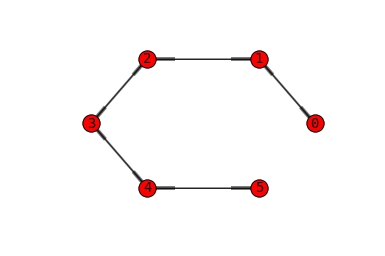

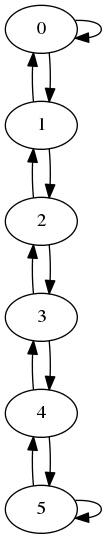

In [145]:
# Convert to networkx graph
graph = nx.DiGraph(P)

# Initial layout
# pos = nx.spring_layout(graph)
pos = nx.circular_layout(graph)
# pos = nx.layout.shell_layout(graph)
# pos = nx.layout.fruchterman_reingold_layout(graph)
# pos = nx.layout.spectral_layout(graph)


# Nodes
nx.draw_networkx_nodes(graph, pos)
nx.draw_networkx_labels(graph, pos, font_size=14, font_family='monospace')

# Edges
eweights = {(i,j): P[i,j] for i,j in graph.edges()}
ecolors = [eweights[k] for k in graph.edges()]
nx.draw_networkx_edges(graph, pos, edgelist=graph.edges(), 
                       edge_color=ecolors, 
                       edge_cmap=plt.cm.Greys, 
                       edge_vmax=1.0, 
                       edge_vmin=0.0,
                       width=2.0,
                       arrows=None)

# To get arrowheads
nx.draw_networkx_edges(graph, pos, edgelist=graph.edges(), alpha=0.5, arrows=True) 


# nx.draw_networkx_edge_labels(graph, pos, edge_labels=eweights)

plt.axis('off')
plt.show()

ptg = nx.nx_pydot.to_pydot(graph)
img = ptg.create_png(prog='twopi')
Image(img)

In [146]:
P

array([[ 0.5,  0.5,  0. ,  0. ,  0. ,  0. ],
       [ 0.5,  0. ,  0.5,  0. ,  0. ,  0. ],
       [ 0. ,  0.5,  0. ,  0.5,  0. ,  0. ],
       [ 0. ,  0. ,  0.5,  0. ,  0.5,  0. ],
       [ 0. ,  0. ,  0. ,  0.5,  0. ,  0.5],
       [ 0. ,  0. ,  0. ,  0. ,  0.5,  0.5]])

# Simulation

Let's write some code to simulate trajectories.

In [242]:
class Int2Unary:
    """
    Convert integer to unary representation (e.g., for tabular case)
    """
    def __init__(self, length):
        self.length = length
        self._array = np.eye(length)

    def __call__(self, x):
        return self._array[x]

In [205]:
def trajectory_gen(P, R, s0=None):
    """Create a generator that """
    if s0 is None:
        s = 1
    else:
        s = s0
    # Problem setup
    ns = len(P)
    states = np.arange(ns)
    I = np.eye(ns)
    
    # Initial state
    x = np.zeros(ns)
    x[s] = 1
    while True:
        # Sample the next state
        dp = np.dot(P, x)
        sp = np.random.choice(states, p=dp)
        xp = I[sp]
        r = R[s, sp]
        
        # Yield the result
        yield (s, r, sp)
        # Set up for the next iteration
        s = sp
        x = xp

In [250]:
def compute_return(steps, gmfunc):
    ret = []
    g = 0
    for step in reversed(steps):
        s, r, sp = step
        g = r + gmfunc(sp)*g
        ret.append((s, g, sp))
    return list(reversed(ret))

def compute_lambda_return(steps, gmfunc, lmfunc, vfunc):
    pass

## Actual Simulation

In [251]:
# Chicken problem solved analytically
ns = 6
I = np.eye(ns)

# Probability of transitioning from state s_i --> s_j = P[i,j]
P = np.zeros((ns, ns))
P[0, 1:3] = 0.5 
P[-3:-1, -1] = 1
P[1, 3] = 1
P[2, 4] = 1
P[-1, 0] = 1

# Expected reward for transitioning from s_i --> s_j = R[i,j]
R = np.zeros((ns, ns))
R[0, 1] = 1
R[0, 2] = -1
R[3, 5] = -1
R[4, 5] = 1
r = np.sum(P*R, axis=1)

# Discount
gvec = np.ones(ns)
gvec[0] = 0
G = np.diag(gvec)

# Bootstrapping
L = np.eye(ns)*0.0

# Function approximation
X = np.eye(ns)


# Value function
v_pi = pinv(I - P @ G) @ r


# From sobel, recursive expected variance contribution?
T = -v_pi**2
for i in range(ns):
    for j in range(ns):
        T[i] += P[i,j] * (R[i,j] + gvec[j]*v_pi[j])**2

# Alternatively,
# T = np.sum(P * (R + G @ v_pi)**2, axis=1) - v_pi**2
        
# Variance (again from Sobel)
v_var = pinv(I - P @ G @ G) @ T 

# Define the experiment
nsteps = 1000
gmfunc = lambda x: 0 if x == 0 else 0.9
lmfunc = lambda x: 0 if x == 0 else 0.0
phi = Int2Unary(nstates)

# Generate a trajectory
gen = trajectory_gen(P, R)
slst = [next(gen) for i in range(nsteps)]
glst = compute_return(slst, gmfunc)
xlst = [(phi(s), r, phi(sp)) for s, r, sp in steps]

In [266]:
gdf = pd.DataFrame(glst, columns=['s', 'g', 'sp'])
grouped = pd.groupby(gdf, 's')
true_value = pd.Series(v_pi, name='true_value')
true_var = pd.Series(v_var, name='true_var')
exp_value = grouped.aggregate({'g': np.mean}).rename(columns={'g': 'exp_value'})
exp_var = grouped.aggregate({'g': np.var}).rename(columns={'g': 'exp_var'})

combined = pd.concat([true_value, exp_value, exp_var, true_var], axis=1)
display(combined)

true_value  exp_value   exp_var  true_var
0    0.421771   0.472413  0.333547  0.434946
1   -0.173842  -0.138889  0.188833  0.248387
2   -0.386316  -0.311891  0.396275  0.538682
3   -0.684638  -0.565013  0.662035  0.951235
4   -1.135102  -0.980360  0.835141  1.529707
5   -1.837811  -1.363996  1.027858  2.160915

In [254]:
grouped.aggregate({'g': np.mean})

g
s          
0  0.472413
1 -0.138889
2 -0.311891
3 -0.565013
4 -0.980360
5 -1.363996

In [255]:
grouped.aggregate({'g': np.var})

g
s          
0  0.333547
1  0.188833
2  0.396275
3  0.662035
4  0.835141
5  1.027858

In [156]:
var_exp = grouped.aggregate({'g': np.var})['g'].as_matrix()

In [157]:
var_exp

array([ 0.0126,  0.0301,  0.0696,  0.1509,  0.25  ])

In [133]:
for name, group in grouped:
    G = group.g
    print(name, G.count())
    print(np.var(G - v_pi[name]))

0 103510
0.012580144030338799
1 51808
0.030068213971853112
2 25853
0.06960482979106289
3 12597
0.15089777610101163
4 6232
0.24999976826711703


In [134]:
# Returns for each episode
elst = [compute_return(ep, gamma) for ep in create_episodes(slst, 0)]

In [241]:
from collections import defaultdict
def first_visit_mc(episodes):
    visits = defaultdict(int)
    gdct = defaultdict(float)
    for episode in episodes:
        seen = set()
        for step in episode:
            s, a, g, sp = step
            if s in seen:
                continue
            else:
                seen.add(s)
                visits[s] += 1
                gdct[s] += g